In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2 as cv
import torch

In [2]:
model = YOLO('yolov8n-seg.pt')

## testing on pre trained seg model


0: 640x384 1 bottle, 1 cell phone, 1 scissors, 86.9ms
Speed: 5.0ms preprocess, 86.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)


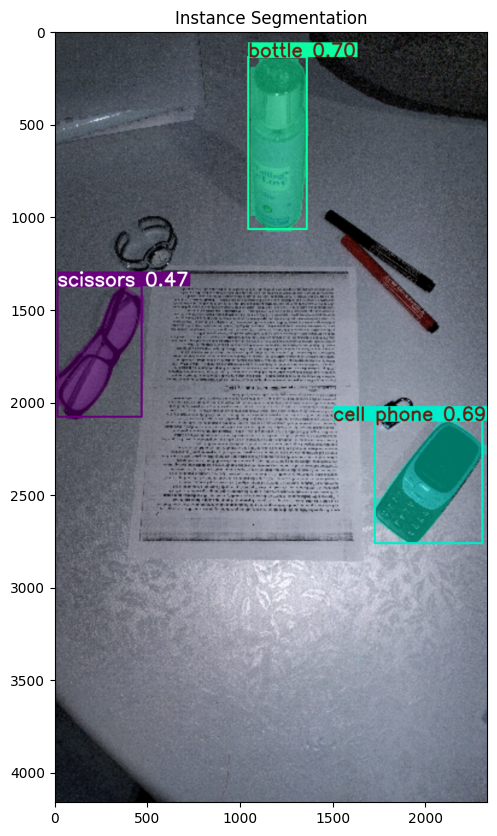

In [3]:
img = cv.imread("data/origin/1b522da4-2.jpg")

instance_results = model.predict(img)
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(15, 10))
plt.title("Instance Segmentation")
plt.imshow(instance_result_array)

In [4]:
result = instance_results[0]
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 39.0
Coordinates: [1042.892333984375, 134.18716430664062, 1358.739013671875, 1064.6295166015625]
Probability: 0.6980034112930298
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

## training

In [5]:
# model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

train_res = model.train(
    data="data/roboflow/data.yaml",  
    epochs=10,  
    imgsz=640,  
    device="cpu", 
)

val = model.val()

Ultralytics 8.3.54  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data/roboflow/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning F:\dev stuff\document-cropper\document_segmentation\yolo\data\roboflow\train\labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 59.12it/s]

train: New cache created: F:\dev stuff\document-cropper\document_segmentation\yolo\data\roboflow\train\labels.cache



val: Scanning F:\dev stuff\document-cropper\document_segmentation\yolo\data\roboflow\valid\labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 43.99it/s]

val: New cache created: F:\dev stuff\document-cropper\document_segmentation\yolo\data\roboflow\valid\labels.cache


Plotting labels to runs\segment\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train16
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.286      7.752      4.989      3.154         11        640: 100%|██████████| 1/1 [00:08<00:00,  8.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]

                   all         11         11    0.00333          1    0.00718    0.00133          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.208      8.352      4.681      3.063         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]

                   all         11         11    0.00152      0.455    0.00184   0.000518          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.267      8.399      4.818      3.262         11        640: 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

                   all         11         11   0.000909      0.273   0.000657   0.000123          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.646      7.257      4.637      2.662         11        640: 100%|██████████| 1/1 [00:06<00:00,  6.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         11         11   0.000606      0.182   0.000464   0.000266          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.895      6.379      4.452      2.894         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         11         11   0.000606      0.182   0.000928   0.000233          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.357      6.072      4.555       3.05         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

                   all         11         11   0.000606      0.182   0.000681   8.53e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.073      5.837       4.51      2.961         11        640: 100%|██████████| 1/1 [00:05<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]

                   all         11         11   0.000606      0.182   0.000639   0.000148          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.929      4.202      4.271       2.86         11        640: 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all         11         11   0.000909      0.273    0.00083   0.000121          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.025      4.058      4.196      2.812         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]

                   all         11         11   0.000909      0.273    0.00104   0.000147          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.683      4.559      3.894       2.71         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all         11         11   0.000606      0.182   0.000636   8.22e-05          0          0          0          0



10 epochs completed in 0.026 hours.
Optimizer stripped from runs\segment\train16\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train16\weights\best.pt, 6.8MB

Validating runs\segment\train16\weights\best.pt...
Ultralytics 8.3.54  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


                   all         11         11    0.00333          1     0.0072    0.00133          0          0          0          0
Speed: 2.5ms preprocess, 137.6ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs\segment\train16
Ultralytics 8.3.54  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning F:\dev stuff\document-cropper\document_segmentation\yolo\data\roboflow\valid\labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


                   all         11         11    0.00333          1     0.0072    0.00133          0          0          0          0
Speed: 2.9ms preprocess, 118.6ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs\segment\train162


In [8]:
results = model("data/origin/6a3437a3-5.jpg")
results[0].show()


image 1/1 f:\dev stuff\document-cropper\document_segmentation\yolo\data\origin\6a3437a3-5.jpg: 640x384 1 cell phone, 66.2ms
Speed: 6.0ms preprocess, 66.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model

Ultralytics 8.3.54  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)

PyTorch: starting from 'runs\segment\train16\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.16.1 opset 19...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export success  3.1s, saved as 'runs\segment\train16\weights\best.onnx' (12.7 MB)

Export complete (3.3s)
Results saved to F:\dev stuff\document-cropper\document_segmentation\yolo\runs\segment\train16\weights
Predict:         yolo predict task=segment model=runs\segment\train16\weights\best.onnx imgsz=640  
Validate:        yolo val task=segment model=runs\segment\train16\weights\best.onnx imgsz=640 data=data/roboflow/data.yaml  
Visualize:       https://netron.app


In [25]:
model2=YOLO('runs\segment\\train16\weights\\last.pt')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pc\AppData\Local\Temp\ipykernel_15656\2042517681.py:1: SyntaxWarning: invalid escape sequence '\s'
  model2=YOLO('runs\segment\\train16\weights\\last.pt')


In [27]:
results = model2("data/origin/405e5285-3.jpg")
results[0].show()


image 1/1 f:\dev stuff\document-cropper\document_segmentation\yolo\data\origin\405e5285-3.jpg: 640x384 (no detections), 54.8ms
Speed: 2.0ms preprocess, 54.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)



image 1/1 f:\dev stuff\document-cropper\document_segmentation\yolo\data\origin\39e09f03-20241224_173747.jpg: 640x384 (no detections), 61.0ms
Speed: 2.0ms preprocess, 61.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)


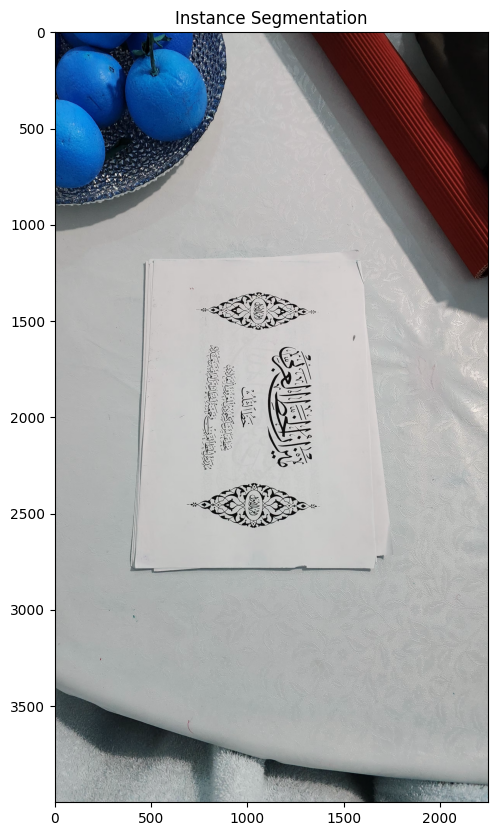

In [20]:
img = cv.imread("data/origin/39e09f03-20241224_173747.jpg")


fig = plt.figure(figsize=(15, 10))
plt.title("Instance Segmentation")
plt.imshow(instance_result_array)

In [78]:
instance_results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'paper'}
 obb: None
 orig_img: array([[[120, 127, 130],
         [119, 124, 127],
         [138, 142, 143],
         ...,
         [171, 172, 168],
         [171, 172, 168],
         [170, 171, 167]],
 
        [[141, 148, 151],
         [139, 144, 147],
         [149, 153, 154],
         ...,
         [176, 177, 173],
         [173, 174, 170],
         [167, 168, 164]],
 
        [[152, 159, 162],
         [146, 151, 154],
         [146, 150, 151],
         ...,
         [177, 178, 174],
         [175, 176, 172],
         [168, 169, 165]],
 
        ...,
 
        [[ 33,  44,  48],
         [ 32,  43,  47],
         [ 23,  35,  39],
         ...,
         [110, 128, 135],
         [111, 129, 136],
         [124, 142, 149]],
 
        [[ 31,  42,  46],
         [ 30,  41,  45],
         [ 23,  35,  39],
         ...,
         [107, 125,

In [75]:
result = instance_results[0]
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

IndexError: index 0 is out of bounds for dimension 0 with size 0